## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the DataFrame.
mice_count = merged_df['Mouse ID'].count()
mice_count

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_data)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = clean_study_data_complete['Mouse ID'].count()
mice_count_clean

1893

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

variance = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

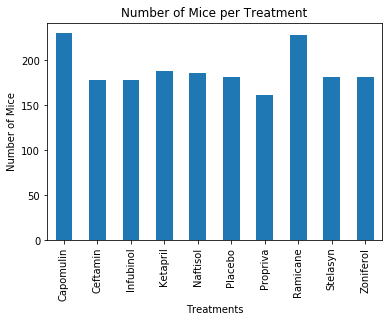

<Figure size 432x288 with 0 Axes>

In [11]:
treatments = clean_study_data_complete.groupby('Drug Regimen')

treatments_mice_total = treatments['Mouse ID'].count()

treatment_chart = treatments_mice_total.plot(kind="bar", title="Number of Mice per Treatment")

treatment_chart.set_xlabel("Treatments")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

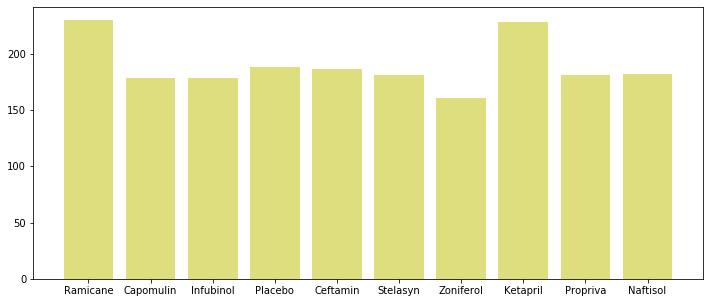

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatments_matplot = clean_study_data_complete["Drug Regimen"].unique()
treatments_matplot


treatment_count = (clean_study_data_complete.groupby(["Drug Regimen"])["Mouse ID"].count())
treatment_count

x_axis = treatments_matplot
plt.figure(figsize=(12,5))
plt.bar(x_axis, treatment_count, color='y',alpha=0.5, align='center')

## Pie Plots

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_study_data_complete.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [14]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


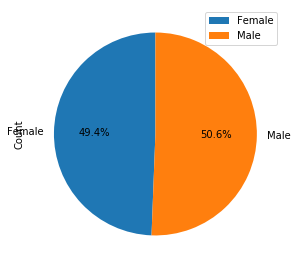

In [15]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=gender_df['Sex'])

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (clean_study_data_complete.groupby(["Sex"])["Age_months"].count())
gender_count

Sex
Female    935
Male      958
Name: Age_months, dtype: int64

(-1.1874943525713364,
 1.1105268056883157,
 -1.1938032889323704,
 1.112116577938631)

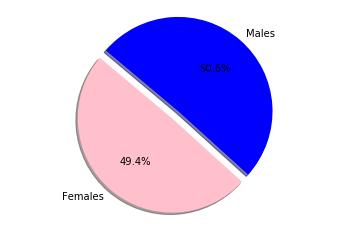

In [17]:
labels = ["Females", "Males"]
colors = ["pink", "blue"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
sorted_df = clean_study_data_complete.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

max_time_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_time_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [19]:
#Capomulin
capomulin_df = max_time_df[max_time_df['Drug Regimen'].isin(['Capomulin'])]
#capomulin_df.head()

capomulin_list = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
#capomulin_list

quartiles = capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


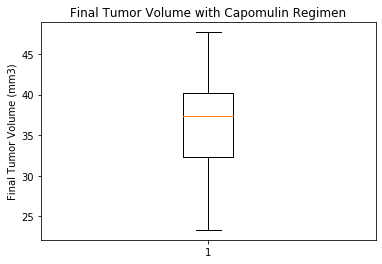

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume with Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(capomulin_list)
plt.show()

In [21]:
#Ramicane

ramicane_df = max_time_df[max_time_df['Drug Regimen'].isin(['Ramicane'])]
#ramicane_df.head()

ramicane_list = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
#ramicane_list

quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 30.981175224999998
The upper quartile is: 38.508305307499995
The interquartile range is: 7.527130082499998
The the median is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


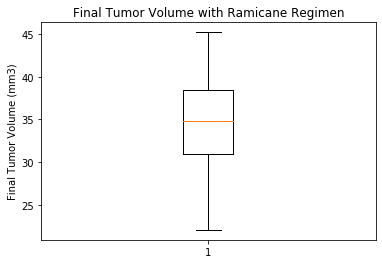

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume with Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ramicane_list)
plt.show()

In [23]:
#Infubinol

infubinol_df = max_time_df[max_time_df['Drug Regimen'].isin(['Infubinol'])]
#infubinol_df.head()

infubinol_list = infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
infubinol_list = infubinol_list["Tumor Volume (mm3)"]
#infubinol_list

quartiles = infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 62.75445141
The upper quartile is: 67.68556862
The interquartile range is: 4.9311172099999965
The the median is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


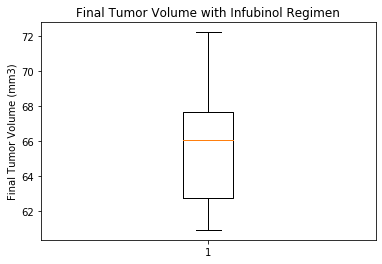

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume with Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(infubinol_list)
plt.show()

In [25]:
#Ceftamin

ceftamin_df = max_time_df[max_time_df['Drug Regimen'].isin(['Ceftamin'])]
#ceftamin_df.head()

ceftamin_list = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
ceftamin_list = ceftamin_list["Tumor Volume (mm3)"]
#ramicane_list

quartiles = ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 61.43389223
The upper quartile is: 67.52748237
The interquartile range is: 6.093590140000003
The the median is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


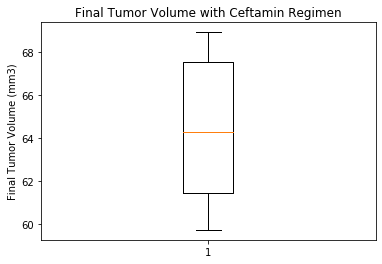

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume with Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ceftamin_list)
plt.show()

## Line and Scatter Plots

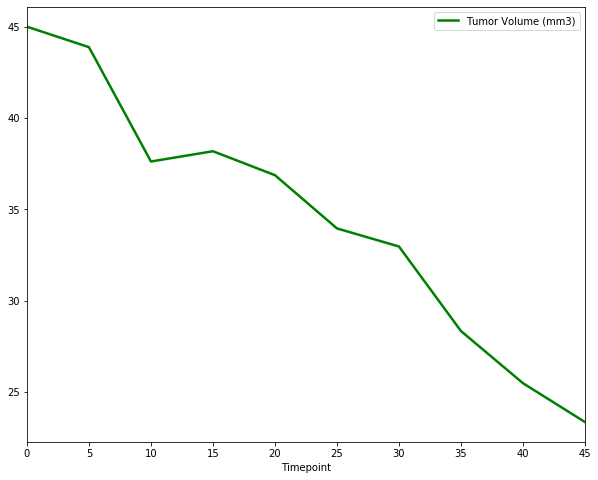

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
#capo_df.head()

capo_single_df = capo_df.loc[capo_df["Mouse ID"] == "s185"]
#capo_single_df

capo_single_df = capo_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

capo_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data_df = capo_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#scatter_data_df.head()

mean_tumor_df = pd.DataFrame(scatter_data_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
#mean_tumor_df.head()

mean_tumor_df = mean_tumor_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
mean_tumor_df.head()

,Mouse ID,Weight (g),Average Tumor Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [36]:
mean_tumor_df = mean_tumor_df.set_index('Mouse ID')

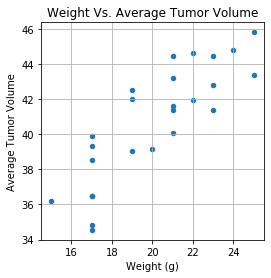

In [38]:
mean_tumor_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mean_tumor_df.iloc[:,0]
avg_tumor_volume = mean_tumor_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


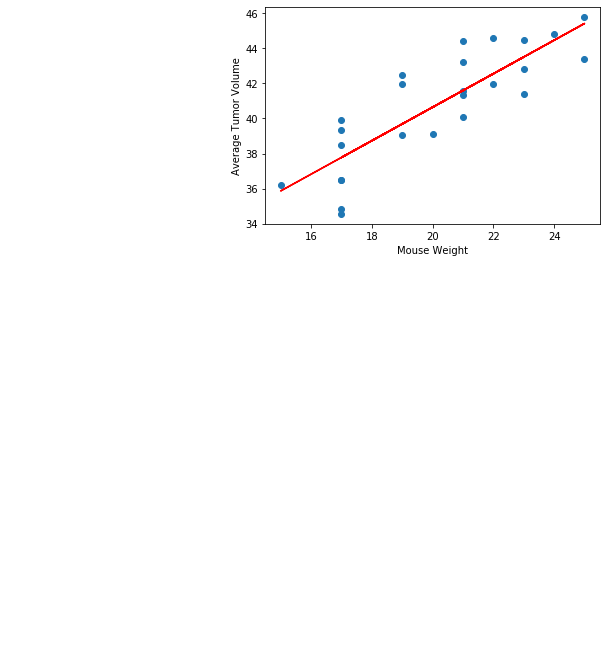

In [41]:
x_values = mean_tumor_df['Weight (g)']
y_values = mean_tumor_df['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()